#Analyze A/B Test Results

##**Table of Contents**
- [Introduction](#scrollTo=TLc8YaqwldFG)

- [Part I - Probability](#scrollTo=HDFoishHlm6K)
- [Part III - Regression ](#scrollTo=5paNTiKibCHz)
- [Part II - A/B Test](#scrollTo=JI-u0NAk-FK-)



#**Introduction**

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

##Part I - Probability
To get started, let's import our libraries.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Data/ab_data.csv'

In [ ]:
# Loading dataset and saving in dataframe
df = pd.read_csv(path)
print(df.shape)
df.head(5)

(294478, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

b. Use the cell below to find the number of rows in the dataset.

In [ ]:
df.shape

(294478, 5)

294478 rows in the dataset

c. The number of unique users in the dataset.

In [ ]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [ ]:
df.user_id.nunique()

290584

290584 unique Users

d. The proportion of users converted.

In [ ]:
df.converted.mean()

0.11965919355605512

About 12 % conversion rate

In [ ]:
df.sample()

,user_id,timestamp,group,landing_page,converted
141449,872953,2017-01-02 18:18:31.117541,treatment,new_page,0


e. The number of times the new_page and treatment don't match.

In [ ]:
len(df.query('group == "treatment" & landing_page == "old_page"')) + len(df.query('group == "control" & landing_page == "new_page"'))

3893

Treatment + old page & Control + new page = 3893

f. Do any of the rows have missing values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


NO missing value in any of the rows.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. Use **Quiz 2** in the classroom to figure out how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in **df2**.

In [ ]:
df2 = df.query('group == "treatment" & landing_page == "new_page" | group == "control" & landing_page == "old_page"')

In [ ]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_ids** are in **df2**?

In [ ]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [ ]:
df2.nunique()['user_id']

290584

b. There is one **user_id** repeated in **df2**. What is it?

In [ ]:
df2.user_id.duplicated().sum()

1

In [ ]:
df2.duplicated().sum()

0

In [ ]:
dublicated_rows = df2[df2.user_id.duplicated()]

In [ ]:
dublicated_rows

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**?

In [ ]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**CONCLUSION:**
Based on above exploration :

- There are 290584 unique ids.
- One of the id is repeating at index: 1899 and other at 2893.
- `timestamp` is the only thing that is `different` in the two rows.
Landing Page was `new_page`, group is `treatment` and value of converted is `0`.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [ ]:
df2 = df2.drop(index = 1899)

In [ ]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

No duplication now.


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [ ]:
df2.sample()

,user_id,timestamp,group,landing_page,converted
167436,872000,2017-01-09 23:11:42.742302,control,old_page,0


In [ ]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the control group, what is the probability they converted?

In [ ]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [ ]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [ ]:
len(df2.query('landing_page == "new_page"'))/df2.shape[0]

0.5000619442226688

c. What is the row information for the repeat **user_id**?

In [ ]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#**CONCLUSION :**
Based on above exploration :

- There are 290584 unique ids.
- One of the id is repeating at index: 1899 and other at 2893.
- `timestamp` is the only thing that is `different` in the `two rows`.
- Landing Page was `new_page`, group is `treatment` and value of converted is `0`


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [ ]:
df2.sample()

,user_id,timestamp,group,landing_page,converted
229009,705418,2017-01-21 20:59:57.661573,control,old_page,0


In [ ]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [ ]:
ctrl_conv = df2.query('group == "control"')['converted'].mean()
ctrl_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [ ]:
treatment_conv = df2.query('group == "treatment"')['converted'].mean()
treatment_conv

0.11880806551510564

In [ ]:
obs_diff = treatment_conv - ctrl_conv
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [ ]:
len(df2.query('landing_page == "new_page"'))/df2.shape[0]

0.5000619442226688

#**CONCLUSION :**

- Probability of converting regardless of landing page type : **0.1196 i.e. 11.96%**.
- Given that an individual was in the `control group`, the probability of `converting` : **0.1204 i.e. 12.04%**.
Given that an individual was in the treatment group, the probability of `converting` : **0.1188 i.e. 11.88%**.
- The probability of receiving the `new page` : **0.5001 i.e. 50.01%**.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**NOTE : There is not enough sufficient evidence to conclude that the new treatment page leads to more conversions.**

**Answer:**

*As evident from the difference (-0.0015), there is not sufficient evidence to say that the treatment page leads to more conversions as the probability of conversion for the treatment group is less than that for the control group.*

-----------------------------------------------

#**Part II - A/B Test**



Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

`1.` For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of **p<sub>new</sub>** and **p<sub>old</sub>**
, which are the converted rates for the old and new pages.

**Answer:**

*Our alternative hypothesis is what we want to prove to be true, in this case, that the new page is better than the old page. And, the null hypothesis is what we assume to be true before analyzing data, which is that the new page has conversion rate that is less than or equal to that of the old page.*

    NULL HYPOTHESIS(H0):        p_new ≤ p_old
    ALTERNATIVE HYPOTHESIS(H1): p_new > p_old

i.e.

    H0:   p_new - p_old ≤ 0
    H1:   p_new - p_old > 0

`2.` Assume under the null hypothesis, **p<sub>new</sub>** and **p<sub>old</sub>** both have "true" success rates equal to the **converted** success rate **ab_data.csv** regardless of page - that is  **p<sub>new</sub>** and **p<sub>old</sub>**are equal. Furthermore, assume they are equal to the converted rate in **ab_data.csv** regardless of the page.


Use a sample size for each page equal to the ones in **ab_data.csv**.


Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use **Quiz 5** in the classroom to make sure you are on the right track.


a. What is the **conversion rate** for  **p<sub>new</sub>**
 under the null?

In [ ]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate**
 for  **p<sub>old</sub>**
 under the null?

In [ ]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is **n<sub>new</sub>**
, the number of individuals in the treatment group?

In [ ]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is  **n<sub>old</sub>**
, the number of individuals in the control group?

In [ ]:
n_old = df2.query('group == "control"').user_id.nunique()
n_old

145274

e. Simulate  **n<sub>new</sub>**
 transactions with a conversion rate of  **p<sub>new</sub>** under the null. Store these **n<sub>new</sub>**
 1's and 0's in **new_page_converted**.

In [ ]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)])
len(new_page_converted)

145310

e. Simulate  **n<sub>old</sub>**
 transactions with a conversion rate of  **p<sub>old</sub>** under the null. Store these **n<sub>old</sub>**
 1's and 0's in **old_page_converted**.

In [ ]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)])
len(old_page_converted)

145274

g. Find **p<sub>new</sub>** - **p<sub>old</sub>** for your simulated values from part (e) and (f).

In [ ]:
new_page_converted = new_page_converted[:145274]

In [ ]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

array([-6.8835442e-06,  0.0000000e+00,  0.0000000e+00, ...,
        0.0000000e+00, -6.8835442e-06,  0.0000000e+00])

h. Create 10,000 **p<sub>new</sub>** - **p<sub>old</sub>** values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

In [ ]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

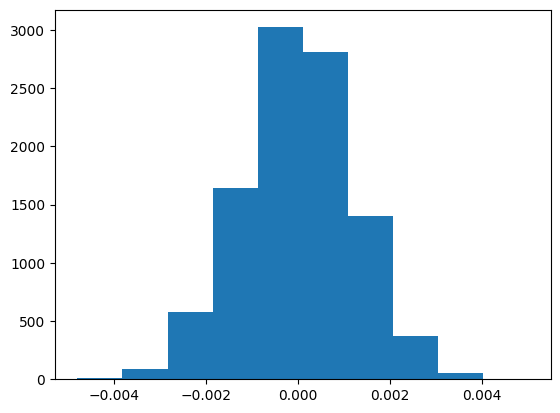

In [ ]:
plt.hist(p_diffs);

P_diffs follow normal distribution and it's exactly what I expected as it follows "CENTRAL LIMIT THEOREM" which states that with large enough sample size, sample distribution of mean will be normally distributed.

In [ ]:
nullvals = np.random.normal(0, p_diffs.std(), 10000)

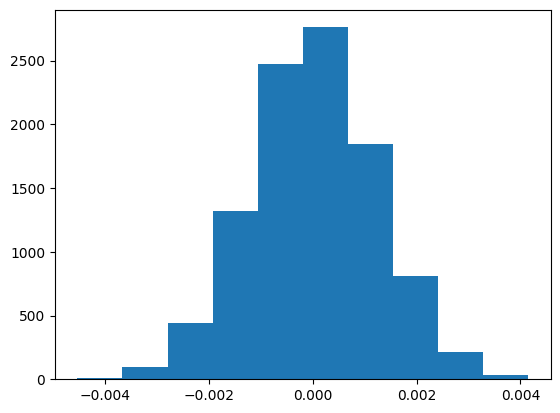

In [ ]:
plt.hist(nullvals);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
actual_diff = df2.query("group == 'treatment'")['converted'].mean() - df2.query("group == 'control'")['converted'].mean()
actual_diff

-0.0015782389853555567

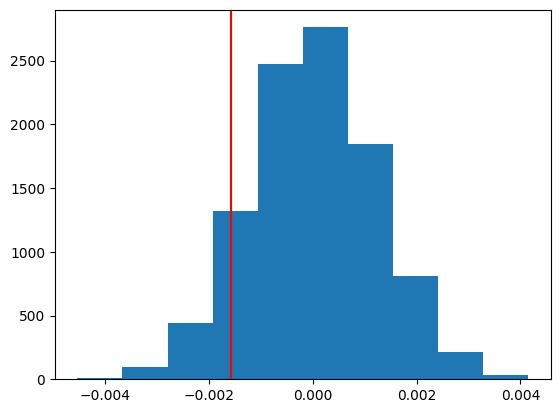

In [ ]:
plt.hist(nullvals);
plt.axvline(actual_diff, color = 'red');

In [ ]:
(nullvals > actual_diff).mean()

0.904

k. Please explain using the vocabulary you've learned in this course what you just computed in part j. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

#**CONCLUSION:**
The proportion of the `p_diffs` that are greater than the actual difference observed in `ab_data.csv` is called **p-value.**
> The p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. A small p-values suggest our null is not true. When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null. By comparing our p-value to our type I error threshold (α), we can make our decision about which hypothesis we will choose.

    p-value ≤ α => Reject H0
    p-value > α => Fail to Reject H0

- As we can see p-value  (0.90)  is far greater than
 (0.05).
- With such high p-value, we conclude the difference in conversion rate between new page and old page does not appear to be significant.

 Hence, we fail to reject the null hypothesis.
- Concluding the new page is not better than old one.
- The actual difference between new page and old page is negative. Which indicates, old page may have a slight advantage over new one.





l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

In [ ]:
print(convert_old, convert_new)
n_old, n_new

17489 17264


(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.
[Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest)  is a helpful link on using the built in.

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

##**CONCLUSION:**

- The values of z-score and p-value reach to the same conclusion as we find earlier. Null hypothesis is correct.
- Therefore, we fail to reject the null hypothesis and conclude that new page is not better than old one.

_________________________________________________

#**Part III - A regression approach**
`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.


a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will perform **Logistic Regression**, as it will a choice between two options.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a**. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received. Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [ ]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
102295,823497,2017-01-20 09:51:12.100817,treatment,new_page,1,1,0,1
81875,786221,2017-01-11 00:42:39.353678,treatment,new_page,0,1,0,1
5266,852245,2017-01-05 06:19:07.399433,control,old_page,0,1,1,0
18969,902994,2017-01-15 22:13:52.560748,control,old_page,0,1,1,0
59349,917146,2017-01-21 21:49:31.581183,control,old_page,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [ ]:
logitmod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
results = logitmod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-04 12:26 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.18988    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**CONCLUSION**

- The p-value associated with `treatment`(ab_page) is 0.1899. It's smaller than the one calculated earlier (0.90). The difference is due to the fact that in part 2
- Reason being, in logistic regression we tried to find whether there is a difference in conversion rate between new page and old page. In part 2, we were finding whether the conversion rate for new page is greater than old page.
- By p-value we can say, we fail to reject the null hypothesis. No change in conclusion from the 2nd part.So that the new page would lead to higher conversions.


    NULL HYPOTHESIS(H0):          p_new = p_old
    ALTERNATIVE HYPOTHESIS(H1):   p_new ≠ p_old

i.e.

    H0:   p_new - p_old = 0
    H1:   p_new - p_old ≠ 0




f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

**CONCLUSION:**

- Yes, we should consider other factors as well. Other factors including, extracts of the time stamp, for example the day of the week, gender, the devices on which tests were done. And also the background, age, country of origin, season, and the academic session might alter the experience and ultimately, conversions. A new column of new student and existing_student might help is to find if there is any chance of having an unfair advantage to the page due to *Change Aversion or Novelty Aversion.*
- The practical significance of a conversion rate( the cost of launching a new feature vs the gain from the increase in conversion) should also be taken in consideration.

Disadvantage: with increasing factors, it will increase the complexity of interpretation and multicollinearity might be a possibility. Although we can handle it using VIF's.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables.

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns -

**Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.



In [ ]:
path_c ='/content/drive/MyDrive/Data/countries.csv'
df_countries = pd.read_csv(path_c)

In [ ]:
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
print(df2.shape, df_countries.shape)
df_countries.country.value_counts()

(290584, 8) (290584, 2)


US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [ ]:
# as the number of rows are similar, combining the two dataset in df_new
df_new = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [ ]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [ ]:
# creating dummie variables for the country
df_new[['CA', 'UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [ ]:
df_new['intercept']= 1

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-04 13:26 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19835    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**CONCLUSION:**

- By looking at the p-values of the countries, even, countries features doesn't have any significant effect on the conversion.
- Since the p-values are greater than 0.05, we fail to reject the null hypothesis, and hence, country has an impact on conversion
- The null is not rejected.
- Conversion is independent of the country.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [ ]:
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'UK', 'US']])
results2 = log_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-04 13:27 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.17599    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
treatment     -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [ ]:
np.exp(results2.params)

intercept    0.131332
treatment    0.985168
UK           1.051944
US           1.041599
dtype: float64

In [ ]:
1/np.exp(results2.params)

intercept    7.614303
treatment    1.015056
UK           0.950621
US           0.960062
dtype: float64

In [ ]:
df_new.groupby('group').mean()['converted']

<ipython-input-80-7db2a0326b85>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new.groupby('group').mean()['converted']


group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [ ]:
# creating higher order interaction term for treatment and country columns

df_new['CA_page'] = df_new['treatment'] * df_new['CA']
df_new['UK_page'] = df_new['treatment'] * df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [ ]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'CA', 'UK', 'CA_page', 'UK_page']])

results3 = log_mod.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2024-01-04 13:28 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19199    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
treatment    -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

 The p-values are greater than `0.05`, we fail to reject the null hypothesis, and hence conclude that the combined page and country also has no impact on conversion.

#**Conclusions for regression:**
- None of the variables, treatment, or country is significant in predicting conversion rate. The company should consider either running the experiment longer to better understand the reason for conversion. Or just be with the older version as it is no different in conversion rate even after changing it.

#**FINAL CONCLUSION:**
- By observing the whole situation (data, conclusion out of it) with the lens of statistics we conclude there is no need to change the existing page.
- In other words, we fail to reject the NULL HYPOTHESIS.